In [1]:
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp

import os

os.chdir("../../../core")
import GT_helper_functions as hf
import GT_load_data as data


In [47]:
%matplotlib inline
# plt.style.use('ggplot')
mlp.rcParams["figure.facecolor"] = "white"
mlp.rcParams["figure.dpi"] = 200
mlp.rcParams["figure.figsize"] = [10,7]
pd.options.display.max_columns = 100
pd.options.display.max_seq_items = 200
sb.set_style("whitegrid")
base_dir = "../../Outcome Measurement Data/"

In [11]:
whoOutcomes  = pd.read_csv(base_dir + "TUBERCULOSIS/WHO/TB_outcomes_2018-11-26.csv")
whoBEsts     = pd.read_csv(base_dir + "TUBERCULOSIS/WHO/TB_burden_countries_2018-11-26.csv")
whoBudget    = pd.read_csv(base_dir + "TUBERCULOSIS/WHO/TB_budget_2018-11-26.csv")
whoNotifs    = pd.read_csv(base_dir + "TUBERCULOSIS/WHO/TB_notifications_2018-11-26.csv")
whoLabs      = pd.read_csv(base_dir + "TUBERCULOSIS/WHO/TB_laboratories_2018-11-26.csv")
whoNRSurv    = pd.read_csv(base_dir + "TUBERCULOSIS/WHO/TB_hiv_nonroutine_surveillance_2018-11-26.csv")
whoExpndUtil = pd.read_csv(base_dir + "TUBERCULOSIS/WHO/TB_expenditure_utilisation_2018-11-26.csv")
whoCommEngg  = pd.read_csv(base_dir + "TUBERCULOSIS/WHO/TB_community_engagement_2018-11-26.csv")

In [6]:
whoBudget.columns

Index(['country', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year',
       'tx_dstb', 'budget_cpp_dstb', 'tx_mdr', 'budget_cpp_mdr', 'tx_xdr',
       'budget_cpp_xdr', 'budget_lab', 'cf_lab', 'budget_staff', 'cf_staff',
       'budget_fld', 'cf_fld', 'budget_prog', 'cf_prog', 'budget_sld',
       'cf_sld', 'budget_mdrmgt', 'cf_mdrmgt', 'budget_tbhiv', 'cf_tbhiv',
       'budget_patsup', 'cf_patsup', 'budget_orsrvy', 'cf_orsrvy',
       'budget_oth', 'cf_oth', 'budget_tot', 'cf_tot', 'cf_tot_domestic',
       'cf_tot_gf', 'cf_tot_usaid', 'cf_tot_grnt', 'cf_tot_sources'],
      dtype='object')

In [5]:
cfvars = ["cf_tot",
"cf_tot_domestic",
"cf_tot_gf",
"cf_tot_grnt",
"cf_tot_sources",
"cf_tot_usaid"]

In [6]:
# who_financial # [who_financial.iso2 == "GT"]

# GBD and WHo TB incidence estimations graph

In [25]:
tbgbd2017 = pd.read_csv(base_dir + "TUBERCULOSIS/GBD 2017/tb_incidence_counts.csv")

In [30]:
tbhivgbd = pd.read_csv(base_dir + "TUBERCULOSIS/GBD 2017/tbhiv_incidence_counts.csv")

In [33]:
popgbd = pd.read_csv(base_dir + "TUBERCULOSIS/GBD 2017/pops_bothsex.csv")
popgbd = popgbd.set_index("year_id")

In [70]:
gbdi =  (tbgbd2017.groupby("year_id").apply(lambda x: x.val.sum()*popgbd["population"][x.year_id.values[0]]) + \
tbhivgbd.groupby("year_id").apply(lambda x: x.val.sum()*popgbd["population"][x.year_id.values[0]]) ).divide(popgbd.population)
gbdiLow =  (tbgbd2017.groupby("year_id").apply(lambda x: x.lower.sum()*popgbd["population"][x.year_id.values[0]]) + \
tbhivgbd.groupby("year_id").apply(lambda x: x.lower.sum()*popgbd["population"][x.year_id.values[0]]) ).divide(popgbd.population)
gbdiHigh =  (tbgbd2017.groupby("year_id").apply(lambda x: x.upper.sum()*popgbd["population"][x.year_id.values[0]]) + \
tbhivgbd.groupby("year_id").apply(lambda x: x.upper.sum()*popgbd["population"][x.year_id.values[0]]) ).divide(popgbd.population)

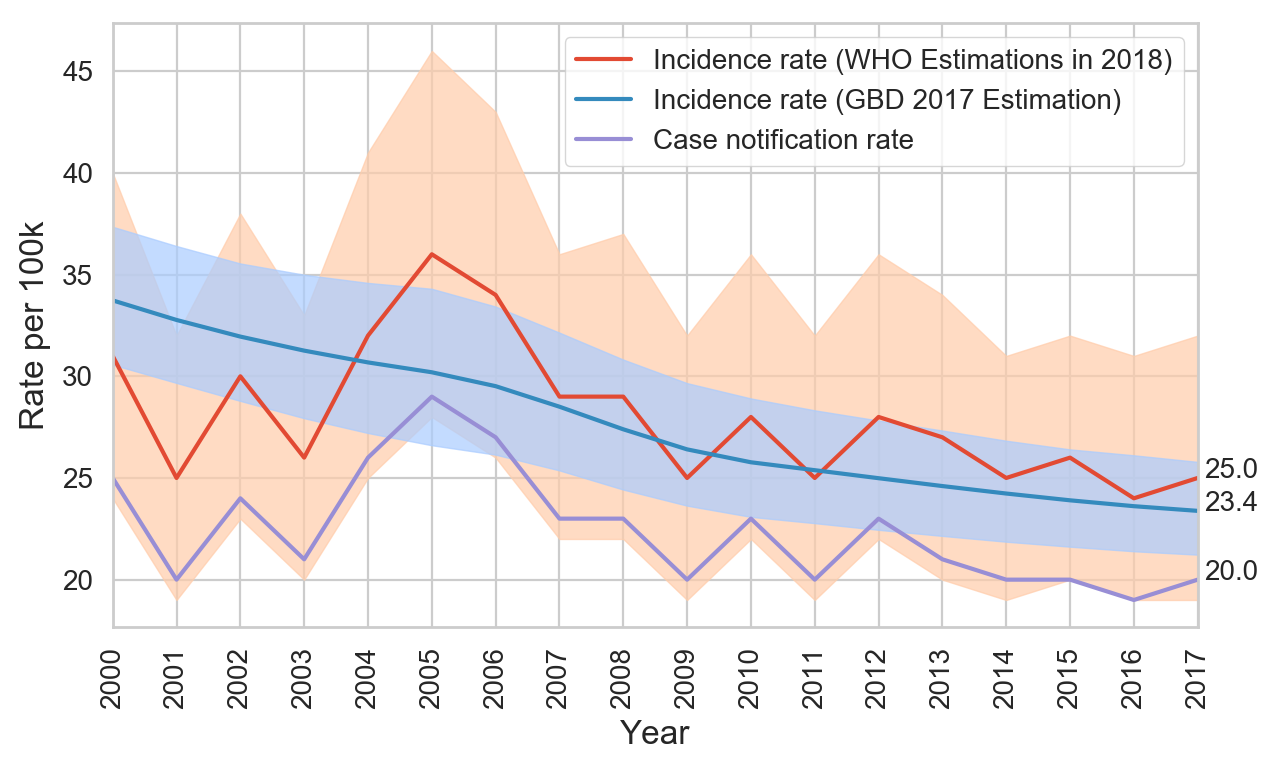

In [75]:
mlp.rcParams["figure.figsize"] = [7,4]

temp = whoBEsts[whoBEsts.iso3 == "GTM"][["e_inc_100k", "c_cdr", "c_newinc_100k", "e_inc_num", "year",
                                        "e_inc_100k_hi", "e_inc_100k_lo"
                ]]
plt.fill_between(temp.year, temp.e_inc_100k_lo, temp.e_inc_100k_hi, color="#ffccaa", alpha=0.7)
plt.fill_between(gbdi.index, gbdiLow.values*100000, gbdiHigh.values*100000, color="#aaccff", alpha=0.7)
plt.plot(temp.year, temp.e_inc_100k, label="Incidence rate (WHO Estimations in 2018)")
plt.plot(gbdi.index, gbdi.values * 100000, label="Incidence rate (GBD 2017 Estimation)")
plt.plot(temp.year, temp.c_newinc_100k, label="Case notification rate")
plt.xticks(gbdi.index, gbdi.index.astype(str), rotation=90)
plt.text(2017.1, temp.e_inc_100k.values[-1], str(temp.e_inc_100k.values[-1]))
plt.text(2017.1, temp.c_newinc_100k.values[-1], str(temp.c_newinc_100k.values[-1]))
plt.text(2017.1, gbdi.values[-1]*100000, str(np.round(gbdi.values[-1]*100000, 1) ) )

plt.xlabel("Year")
plt.ylabel("Rate per 100k")
plt.xlim(2000, 2017)
plt.legend()
# temp